# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#Import the twitter-archive-enhanced.csv data and load into a dataframe
import pandas as pd
twitter_archived = pd.read_csv('twitter-archive-enhanced.csv')


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
#Import the requests library to get a response
import requests
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [3]:
image_data = response.content

In [4]:
with open('image-predictions.tsv', 'wb') as outfile:
    outfile.write(image_data)

In [5]:
!ls

act_report.html        twitter-api.py		     wrangle_report.ipynb
act_report.ipynb       twitter-archive-enhanced.csv  wrangle_report.pdf
image-predictions.tsv  twitter_archive_master.csv
tweet-json.txt	       wrangle_act.ipynb


In [6]:
#Read image-predictions.tsv into a dataframe
image_predictions = pd.read_csv('image-predictions.tsv', delimiter = "\t")
image_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
import json
df_list = []
with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweets = json.loads(line)
        tweet_id = tweets['id']
        retweet_count = tweets['retweet_count']
        favorite_count = tweets['favorite_count']
        df_list.append({
                       'tweet_id': tweet_id,
                      'retweet_count' : retweet_count,
                      'favorite_count' : favorite_count})     
    dog_count_list = pd.DataFrame(df_list)
        

In [8]:
dog_count_list.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



Programmatic assessment of the three Dataframes

In [9]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


There are 2075 rows in image_predictions. Expected 2356 entries

In [10]:
twitter_archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2356 rows in twitter_archived dataframe which was expected. There are null values present.
tweet_id is an integer type. Expected string type.

In [11]:
dog_count_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


2354 rows in the dog_count_list dataframe. Expected 2356 entries. tweet_id is an integer type. Expected string type.

In [12]:
sum(image_predictions.duplicated())

0

In [13]:
sum(twitter_archived.duplicated())

0

In [14]:
sum(dog_count_list.duplicated())

0

No duplicate entries in the three dataframes.

In [15]:
image_predictions.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1346,759197388317847553,https://pbs.twimg.com/media/Cok1_sjXgAU3xpp.jpg,1,kuvasz,0.511341,True,golden_retriever,0.076899,True,white_wolf,0.063269,False
1767,826958653328592898,https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg,1,golden_retriever,0.617389,True,Labrador_retriever,0.337053,True,tennis_ball,0.008554,False
575,678643457146150913,https://pbs.twimg.com/media/CWsGnyMVEAAM1Y1.jpg,1,Labrador_retriever,0.338757,True,flat-coated_retriever,0.304470,True,chest,0.093392,False


Detected upper case letters in p1 and p3 columns in the image_predictions dataframe. Only lowercase letters should be present

Detected via visual assessment

In [16]:
twitter_archived.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
882,760290219849637889,NaN,NaN,2016-08-02 01:44:48 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Rocco. He's doing his best. 13/10 some...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760290219...,13,10,Rocco,None,None,None,None
2211,668614819948453888,NaN,NaN,2015-11-23 02:19:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a horned dog. Much grace. Can jump ove...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668614819...,7,10,a,None,None,None,None


Timestamp column should be split into two columns(date and time)

Multiple columns for dog stage.

All done by visual assessment.

In [17]:
all_columns = pd.Series(list(twitter_archived)+list(image_predictions)+list(dog_count_list))
all_columns[all_columns.duplicated()]

17    tweet_id
31    tweet_id
dtype: object

tweet_id is duplicated in all 3 dataframes

In [18]:
twitter_archived.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

Some Denominator ratings are greater than 10. All denominator ratings should be equal to 10.

### Quality issues

1. Missing values represented by NaN and None.

2. Date and time columns in string type.

3. Extract correct ratings from the text column

4. Some denominator ratings are less than 10

5. Tweet Id is integer type.

6. A name called a and an.

7. Mixture of upper and lower case letters in p1, p2 and p3 columns.

8. Text between tags in source column.

### Tidiness issues
1. tweet_id in  twitter_archived table is duplicated in image_predictions table 

2. There are retweeted columns so it has to be dropped.

3. Split timestamp column in twitter_archived dataframe into date and time columns

4. Dog Stages in multiple columns instead of a single column

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [19]:
# Make copies of original pieces of data
image_predictions_clean = image_predictions.copy()
twitter_archived_clean = twitter_archived.copy()
dog_count_clean = dog_count_list.copy()

### Issue #1:
Missing Values

#### Define:
Replace None values with NaN

#### Code

In [20]:
#convert None entries to Nan using np.nan
import numpy as np
twitter_archived_clean = twitter_archived_clean.replace('None', np.nan)

#### Test

In [21]:
twitter_archived_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN


### Issue #2: Tidiness

#### Define
Merge the three dataframes on tweet_id and drop the retweeted columns.

#### Code


In [22]:
#Create a new column all_clean containing a merged dataframe and drop the retweeted columns
all_clean = twitter_archived_clean.merge(image_predictions_clean, on='tweet_id').merge(dog_count_clean, on='tweet_id')
all_clean = all_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'retweet_count'], axis=1)

#### Test

In [23]:
#confirm merged column
all_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819


In [24]:
all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 24 columns):
tweet_id              2073 non-null int64
timestamp             2073 non-null object
source                2073 non-null object
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  1496 non-null object
doggo                 80 non-null object
floofer               8 non-null object
pupper                221 non-null object
puppo                 24 non-null object
jpg_url               2073 non-null object
img_num               2073 non-null int64
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null bool
p2                    2073 non-null object
p2_conf               2073 non-null float64
p2_dog                2073 non-null bool
p3                    2073 non-null object
p3_c

#### Define
Convert timestamp type into datetime and split it into date and time columns. Drop timestamp column after splitting

#### Code

In [25]:
all_clean['timestamp'] = pd.to_datetime(all_clean.timestamp)
dates,times = zip(*[(d.date(), d.time()) for d in all_clean['timestamp']])
all_clean = all_clean.assign(date=dates, time=times)
all_clean = all_clean.drop('timestamp', axis=1)

#### Test

In [26]:
#Confirm the timestamp column has been dropped.
all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 25 columns):
tweet_id              2073 non-null int64
source                2073 non-null object
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  1496 non-null object
doggo                 80 non-null object
floofer               8 non-null object
pupper                221 non-null object
puppo                 24 non-null object
jpg_url               2073 non-null object
img_num               2073 non-null int64
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null bool
p2                    2073 non-null object
p2_conf               2073 non-null float64
p2_dog                2073 non-null bool
p3                    2073 non-null object
p3_conf               2073 non-null float64
p3_

#### Define
Convert the multiple column of dog stages to a single column using melt function

#### Code

In [27]:
all_clean = pd.melt(all_clean, id_vars=['tweet_id', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf','p3_dog', 'favorite_count',  'date', 'time'],
                           var_name='dog_stage', value_vars=['doggo', 'floofer', 'pupper', 'puppo'])


#### Test

In [28]:
#Confirm the presence of dog_stage column
list(all_clean)

['tweet_id',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'favorite_count',
 'date',
 'time',
 'dog_stage',
 'value']

### Quality Issues

#### Define
Convert date and time columns from string type to date and time type

#### Code

In [29]:
#Using .to_datetime pandas function
all_clean['date'] = pd.to_datetime(all_clean['date'])

#### Test

In [30]:
#check to see if the code worked
all_clean.dtypes

tweet_id                       int64
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
jpg_url                       object
img_num                        int64
p1                            object
p1_conf                      float64
p1_dog                          bool
p2                            object
p2_conf                      float64
p2_dog                          bool
p3                            object
p3_conf                      float64
p3_dog                          bool
favorite_count                 int64
date                  datetime64[ns]
time                          object
dog_stage                     object
value                         object
dtype: object

#### Define
Extract the correct numerator ratings from the text column

#### Code

In [31]:
all_clean['fraction_numerator']= all_clean.text.str.extract('([0-9]+)')
all_clean.fraction_numerator = all_clean.fraction_numerator.astype(int)

#### Test

In [32]:
#Confirm the code worked
all_clean.fraction_numerator.dtype

dtype('int64')

#### Define
Convert denominator ratings that are less or greater than 10 to equals 10

#### Code

In [33]:
all_clean.loc[all_clean['rating_denominator'] < 10, 'rating_denominator'] = 10
all_clean.loc[all_clean['rating_denominator'] > 10, 'rating_denominator'] = 10

#### Test

In [34]:
#confirm all denominator equals 10
all_clean['rating_denominator'].value_counts()

10    8292
Name: rating_denominator, dtype: int64

#### Define
Replace the name 'a' with NaN

#### Code

In [35]:
#use the .replace method
all_clean.name = all_clean.name.replace('a', np.nan)
all_clean.name = all_clean.name.replace('an', np.nan)

#### Test

In [36]:
#Confirm there is no name with a
all_clean.name.value_counts

<bound method IndexOpsMixin.value_counts of 0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5            NaN
6            Jax
7            NaN
8           Zoey
9         Cassie
10          Koda
11         Bruno
12           NaN
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Gerald
20       Jeffrey
21          such
22        Canela
23           NaN
24           NaN
25          Maya
26        Mingus
27         Derek
28        Roscoe
29       Waffles
          ...   
8262       quite
8263         NaN
8264         NaN
8265         NaN
8266         NaN
8267         NaN
8268         NaN
8269         NaN
8270         NaN
8271         NaN
8272         NaN
8273         NaN
8274         NaN
8275         NaN
8276         NaN
8277         NaN
8278         NaN
8279         NaN
8280         NaN
8281         the
8282         the
8283         NaN
8284         NaN
8285         NaN
8286         NaN
8287

#### Define
Change tweet_id type from int to string type

#### Code

In [37]:
all_clean.tweet_id = all_clean.tweet_id.astype(str)

#### Test

In [38]:
#confirm datatype
all_clean.tweet_id.dtypes

dtype('O')

#### Define
Change uppercase entries to lower case in p1, p2 and p3 columns

#### Code

In [39]:
#use .str.lower()
all_clean.p1 = all_clean.p1.str.lower()
all_clean.p2 = all_clean.p2.str.lower()
all_clean.p3 = all_clean.p3.str.lower()

#### Test

In [40]:
#confirm code worked
all_clean[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,orange,bagel,banana
1,chihuahua,pekinese,papillon
2,chihuahua,malamute,kelpie
3,paper_towel,labrador_retriever,spatula
4,basset,english_springer,german_short-haired_pointer


#### Define
Extract text from tags

#### Code

In [41]:
#Using regular expressions
all_clean.source = all_clean.source.str.extract('(?:.*>)([a-zA-Z-\s]+)(?:.*<)')

#### Test

In [42]:
all_clean.source.sample(5)

6810    Twitter for iPhone
3001    Twitter for iPhone
188     Twitter for iPhone
6345    Twitter for iPhone
357     Twitter for iPhone
Name: source, dtype: object

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [43]:
all_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
all_clean.head(2)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,...,p2_dog,p3,p3_conf,p3_dog,favorite_count,date,time,dog_stage,value,fraction_numerator
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,...,False,banana,0.076110,False,39467,2017-08-01,16:23:56,doggo,NaN,13
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,...,True,papillon,0.068957,True,33819,2017-08-01,00:17:27,doggo,NaN,13


Get the most common predicted kind of dogs

In [46]:
p1_counts = all_clean.p1.value_counts()
p1_counts

golden_retriever             600
labrador_retriever           400
pembroke                     352
chihuahua                    332
pug                          228
chow                         176
samoyed                      172
toy_poodle                   156
pomeranian                   152
cocker_spaniel               120
malamute                     120
french_bulldog               104
miniature_pinscher            92
chesapeake_bay_retriever      92
seat_belt                     88
german_shepherd               80
siberian_husky                80
staffordshire_bullterrier     80
cardigan                      76
web_site                      76
teddy                         72
beagle                        72
maltese_dog                   72
shetland_sheepdog             72
eskimo_dog                    72
rottweiler                    68
shih-tzu                      68
lakeland_terrier              68
kuvasz                        64
italian_greyhound             64
          

In [47]:
all_clean.p2.value_counts()

labrador_retriever                416
golden_retriever                  368
cardigan                          296
chihuahua                         176
pomeranian                        168
french_bulldog                    164
chesapeake_bay_retriever          164
toy_poodle                        148
cocker_spaniel                    136
siberian_husky                    132
miniature_poodle                  132
beagle                            112
pembroke                          108
eskimo_dog                        108
collie                            108
kuvasz                            104
italian_greyhound                  88
pekinese                           84
american_staffordshire_terrier     84
chow                               80
malinois                           80
samoyed                            80
toy_terrier                        80
miniature_pinscher                 80
boston_bull                        76
norwegian_elkhound                 76
staffordshir

In [48]:
all_clean.p3.value_counts()

labrador_retriever                316
chihuahua                         232
golden_retriever                  192
eskimo_dog                        152
kelpie                            140
kuvasz                            136
chow                              128
staffordshire_bullterrier         128
cocker_spaniel                    124
beagle                            120
pekinese                          116
toy_poodle                        116
pomeranian                        116
chesapeake_bay_retriever          108
great_pyrenees                    108
pembroke                          108
french_bulldog                    104
malamute                          104
american_staffordshire_terrier     96
cardigan                           92
pug                                92
basenji                            84
bull_mastiff                       80
toy_terrier                        80
siberian_husky                     76
boston_bull                        68
shetland_she

Most rated number of dogs

In [49]:
all_clean.fraction_numerator.value_counts()

12      1852
10      1668
11      1576
13      1108
9        572
8        392
7        192
14       144
6        136
5        128
3        108
2        100
4         88
1         36
0         24
50         8
98         8
80         8
31         8
2015       8
100        8
92         4
121        4
47         4
24         4
236        4
88         4
144        4
400        4
1776       4
2016       4
204        4
15         4
17         4
33         4
97         4
150        4
84         4
46         4
420        4
2195       4
2002       4
1949       4
165        4
987        4
2003       4
143        4
61         4
44         4
60         4
45         4
Name: fraction_numerator, dtype: int64

Check the year with the highest ratings with pd.Grouper function

In [50]:
group_year = all_clean.groupby(pd.Grouper(key='date', axis=0, freq='Y')).sum()
group_year = group_year.reset_index()

### Insights:
1. The most common predicted type of dogs was labrador retriever and golden retreiver.

2. The most common ratings was 12/10

3. The highest ratings were in 2016 and the lowest ratings in 2017.

4. Analysis of the first, second and third prediction of each breed of dog showed that 74% of predictions were True and 26% of predictions False.

5. 98% of tweets were tweeted from an Iphone(using the twitter application), 2% from Twitter Web Client.

6. The most common dog name was Charlie.



Count the value of the True and False predictions

In [51]:
all_clean.p1_dog.value_counts()

True     6124
False    2168
Name: p1_dog, dtype: int64

In [52]:
all_clean.p2_dog.value_counts()

True     6208
False    2084
Name: p2_dog, dtype: int64

In [53]:
all_clean.p3_dog.value_counts()

True     5992
False    2300
Name: p3_dog, dtype: int64

Source of tweet for description of dogs and ratings

In [54]:
all_clean.source.value_counts()

Twitter for iPhone    8128
Twitter Web Client     120
TweetDeck               44
Name: source, dtype: int64

Dog name count

In [55]:
all_clean.name.value_counts()

Charlie      44
Penny        40
Oliver       40
Lucy         40
Cooper       40
Tucker       40
Winston      32
Sadie        32
Lola         32
Bo           32
Toby         28
the          28
Daisy        28
Jax          24
Rusty        24
Scout        24
Koda         24
Milo         24
Dave         24
Stanley      24
Bailey       24
Bella        24
Leo          20
Alfie        20
Oscar        20
Buddy        20
Chester      20
Larry        20
Louis        20
Winnie       16
             ..
Godzilla      4
Mimosa        4
Stewie        4
Dunkin        4
Blipson       4
Gerbald       4
Tyrone        4
Dex           4
Rontu         4
Joshwa        4
Jeremy        4
Opie          4
Ronduh        4
Brandy        4
Rinna         4
Ulysses       4
Akumi         4
Crumpet       4
Aiden         4
Cheesy        4
Sid           4
Meera         4
Zeus          4
Leela         4
Kayla         4
Divine        4
Bookstore     4
Carbon        4
Pancake       4
Oreo          4
Name: name, Length: 933,

The most common names for the dogs is Charlie

### Visualization

Count the  True and False Predictions of the first, second and third predictions of dog breeds.

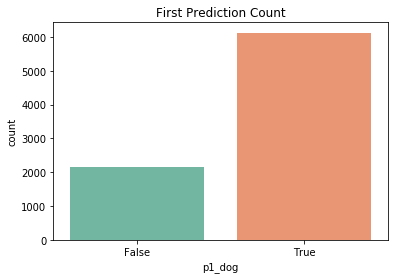

In [56]:
sns.countplot(all_clean.p1_dog, palette='Set2').set(title='First Prediction Count')
plt.show()

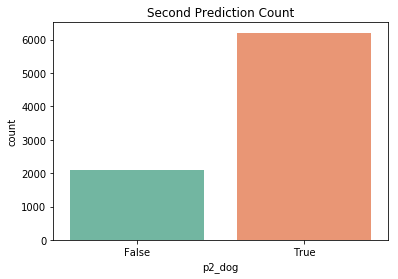

In [57]:
sns.countplot(all_clean.p2_dog,  palette='Set2').set(title='Second Prediction Count')
plt.show()

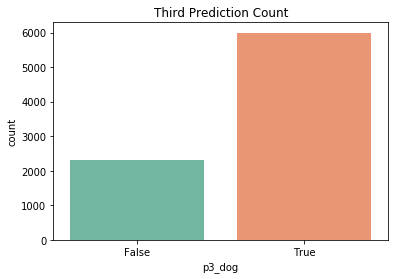

In [58]:
sns.countplot(all_clean.p3_dog , palette='Set2').set(title='Third Prediction Count')
plt.show()

Analysis of the first, second and third prediction of each breed of dog showed that 74% of predictions were True and 26% of predictions False.



Visual representation of tweets source

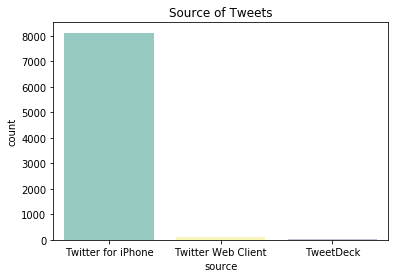

In [59]:
sns.countplot(all_clean.source,  palette='Set3').set(title='Source of Tweets')
plt.show()